### Linear Regression Closed Form Solution
$$\theta = (X^TX)^{-1}X^Ty$$
Helps us find the right $\theta$ by just applying this

#### Dimensions:
$$X => m \times (n+1)$$
$$y => m \times 1$$
$$\theta => (n+1) \times 1$$

#### Proof

We know,
$$J(\theta) = \frac{1}{m}\sum_{i=1}^m(y_{pred} - y)^2$$
where,
$$y_{pred} = h_{\theta}(x) = \sum_{i=0}^n\theta_ix_i$$
and,
$$x_0 = 1$$

#### In matrix notation:

$$J(\theta) = \frac{1}{m}(X\theta - y)^2$$
For scalar,
$$J(\theta) = \frac{1}{m}(X\theta - y)^T(X\theta - y)$$
Multiplying and simplifiying,
$$J(\theta) = \theta^TX^TX\theta - \theta^TX^Ty - y^TX\theta - y^Ty$$

For minimum value, we differentiate, and get
$$\theta = (X^TX)^{-1}X^Ty$$

### Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

plt.style.use("dark_background")

In [9]:
X, Y = make_regression(n_samples=400, n_features=1, n_informative=1, noise=10, random_state=1)

Y = Y.reshape(-1, 1)
print(X.shape, Y.shape)

(400, 1) (400, 1)


In [11]:
# Normalise
X = (X - X.mean())/X.std()

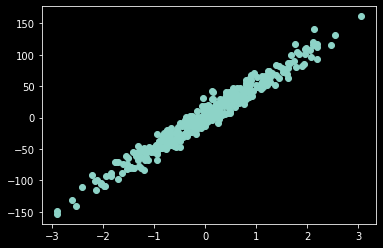

In [12]:
plt.scatter(X, Y)
plt.show()

In [15]:
# Add dummy x0

ones = np.ones((X.shape[0], 1))

X_ = np.hstack((X, ones))
X_.shape


(400, 2)

In [16]:
# Functions
def predict(X, theta):
    return np.dot(X, theta)

def getThetaClosedForm(X, Y):

    firstPart = np.dot(X.T, X)
    secondPart = np.dot(X.T, Y)

    return np.dot(np.linalg.pinv(firstPart), secondPart)

In [17]:
theta = getThetaClosedForm(X_, Y)
theta

array([[50.62196534],
       [ 2.41565243]])

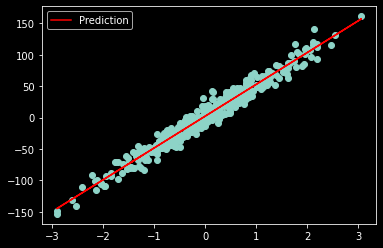

In [18]:
plt.scatter(X, Y)
plt.plot(X, predict(X_, theta), color="red", label="Prediction")
plt.legend()
plt.show()

Our prediction model works quite well